In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

In [2]:
df = pd.read_csv('data1.csv', parse_dates=['Date', 'Time'])

In [3]:
df.head()

,Name,Team,Activity,Distance,Pace,Moving Time,Start,Date,Time
0,Bong Mascardo,Blue,Run,5.00,0:08:02,0:40:10,4:52,2018-04-21,2018-04-21 04:52:00
1,Aguinaldo Catalan,Lavender,Run,4.31,0:10:45,0:46:23,5:20,2018-04-21,2018-04-21 05:20:00
2,Jesse Buban,Green,Bike,29.97,0:18:06,1:36:53,5:25,2018-04-21,2018-04-21 05:25:00
3,Javier Rubis,Yellow,Run,2.49,0:13:06,0:32:44,6:29,2018-04-21,2018-04-21 06:29:00
4,Debbie Anne Borabo,Green,Run,4.89,0:06:11,0:30:15,6:44,2018-04-21,2018-04-21 06:44:00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 9 columns):
Name           109 non-null object
Team           109 non-null object
Activity       109 non-null object
Distance       109 non-null float64
Pace           60 non-null object
Moving Time    28 non-null object
Start          109 non-null object
Date           109 non-null datetime64[ns]
Time           109 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(6)
memory usage: 7.7+ KB


### Total Mileage by Team per Activity

In [5]:
df.groupby(['Activity', 'Team']).sum()

Distance
Activity Team              
Bike     Blue         52.07
         Green       400.86
         Lavender    470.12
         Yellow       20.22
Run      Blue        106.66
         Green       215.66
         Lavender    112.34
         Yellow      165.51

### Run Mileage Ranking

In [6]:
total_run_distance = df[df.Activity == 'Run'].groupby('Team').sum()
total_run_distance = total_run_distance.sort_values(['Distance'], ascending=False).reset_index()
total_run_distance

,Team,Distance
0,Green,215.66
1,Yellow,165.51
2,Lavender,112.34
3,Blue,106.66


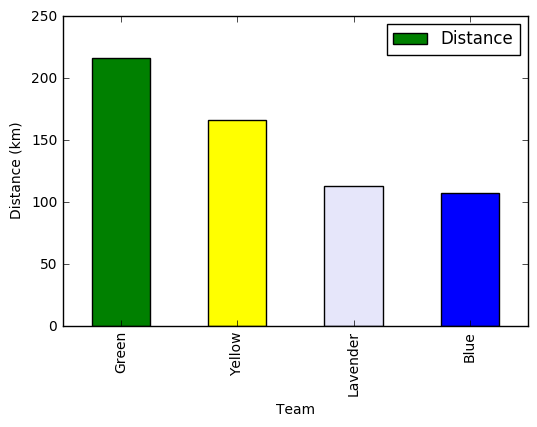

In [7]:
ax = total_run_distance.plot(x='Team', y='Distance', kind='bar', color=total_run_distance['Team'])
ax.set_ylabel('Distance (km)')

### Bike Mileage Ranking

In [8]:
total_bike_distance = df[df.Activity == 'Bike'].groupby('Team').sum()
total_bike_distance = total_bike_distance.sort_values(['Distance'], ascending=False).reset_index()
total_bike_distance

,Team,Distance
0,Lavender,470.12
1,Green,400.86
2,Blue,52.07
3,Yellow,20.22


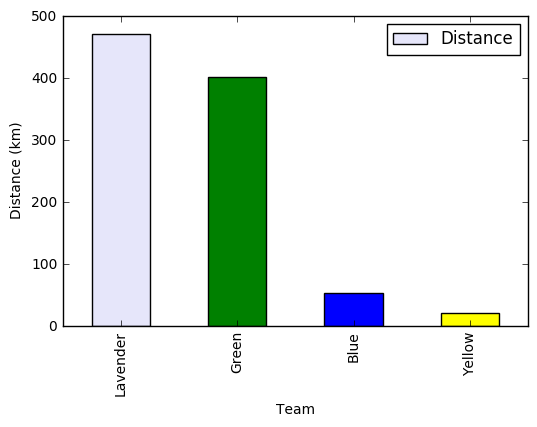

In [9]:
ax = total_bike_distance.plot(x='Team', y='Distance', kind='bar', color=total_bike_distance['Team'])
ax.set_ylabel('Distance (km)')

# Total Mielage Per Activity

In [10]:
df.groupby(['Activity']).sum()

,Distance
Activity,
Bike,943.27
Run,600.17


# Total Mileage (all activity)

In [11]:
df['Distance'].sum()

1543.4399999999998

# Total Active Time per Activity

In [12]:
df['Moving Time'] = pd.to_timedelta(df['Moving Time'])

In [13]:
df[['Moving Time', 'Activity']].groupby(['Activity']).sum()

,Moving Time
Activity,
Bike,23:51:09
Run,18:23:44


# Total Active Time

In [14]:
df['Moving Time'].sum()

Timedelta('1 days 18:14:53')

# Unique Participants

In [15]:
df['Name'].unique()

array(['Bong Mascardo', 'Aguinaldo Catalan', 'Jesse Buban', 'Javier Rubis',
       'Debbie Anne Borabo', 'Paolo Digo', 'Lito Hatoc',
       'Dominicano Dela Rosa', 'Charles De Jesus', 'Gerry Gerona',
       'Joy Garcia', 'Maan Carbonel-Caballero', 'Ferdinand Laguilles',
       'Tintin Espartinez', 'Ken Michael Florece', 'Abe Manansala',
       'Fidel See', 'Edgardo Lota', 'Thonz de Veco', 'Leah Hererra',
       'Cherry Acha', 'Mel Labao', 'Kenneth Lagamayo', 'Angela Cal Ortiz',
       'Lightgrenadez Temz', 'Ronn Andador', 'AJ Ordonez',
       'Marinelle Freo', 'Jimmy Basaysay', 'Abegail Gatdula',
       'Shyrel Castor', 'Marilyn Reverente', 'Mark Anthony Francisco',
       'Rowan Jalmasco', 'Monica Labini', 'Sharlain Mae Osea',
       'Gabriel Balonzo'], dtype=object)

### Number of Unique Participants

In [16]:
len(df['Name'].unique())

37

### Most Active Participant

In [17]:
df['Name'].value_counts()

Ferdinand Laguilles        7
Aguinaldo Catalan          6
Fidel See                  6
Lito Hatoc                 6
Dominicano Dela Rosa       6
Edgardo Lota               6
Paolo Digo                 5
Joy Garcia                 5
Charles De Jesus           5
Gerry Gerona               5
Tintin Espartinez          4
Maan Carbonel-Caballero    4
Angela Cal Ortiz           3
Ken Michael Florece        3
Thonz de Veco              3
Lightgrenadez Temz         3
Bong Mascardo              3
Abe Manansala              2
Marinelle Freo             2
Cherry Acha                2
Jesse Buban                2
AJ Ordonez                 2
Kenneth Lagamayo           2
Jimmy Basaysay             2
Mel Labao                  2
Leah Hererra               2
Mark Anthony Francisco     1
Gabriel Balonzo            1
Sharlain Mae Osea          1
Ronn Andador               1
Monica Labini              1
Marilyn Reverente          1
Shyrel Castor              1
Rowan Jalmasco             1
Abegail Gatdul

# Longest Bike Ride

In [18]:
df.loc[df.Distance[df.Activity=='Bike'].idxmax()]

Name                  Edgardo Lota
Team                      Lavender
Activity                      Bike
Distance                    119.25
Pace                           NaN
Moving Time                    NaT
Start                         4:48
Date           2018-04-26 00:00:00
Time           2018-04-26 04:48:00
Name: 80, dtype: object

# Longest Run

In [19]:
df.loc[df.Distance[df.Activity=='Run'].idxmax()]

Name                    Joy Garcia
Team                         Green
Activity                       Run
Distance                     20.41
Pace                       0:09:15
Moving Time                    NaT
Start                        17:49
Date           2018-04-25 00:00:00
Time           2018-04-25 17:49:00
Name: 64, dtype: object

# Who have total run mileage greater than 'n' km?

In [20]:
n = 10
total_run = df[df.Activity=='Run'].groupby(['Name']).sum()
total_run[total_run.Distance > n].sort_values(['Distance'], ascending=False)

,Distance
Name,
Charles De Jesus,57.88
Aguinaldo Catalan,49.93
Tintin Espartinez,43.71
Ferdinand Laguilles,41.62
Joy Garcia,41.30
Maan Carbonel-Caballero,34.69
Gerry Gerona,31.39
Dominicano Dela Rosa,30.98
Fidel See,30.49


# Who have total bike mileage greater than 'n' km?

In [21]:
n = 50
total_run = df[df.Activity=='Bike'].groupby(['Name']).sum()
total_run[total_run.Distance > n].sort_values(['Distance'], ascending=False)

,Distance
Name,
Lito Hatoc,256.95
Edgardo Lota,188.13
Ken Michael Florece,109.29
Lightgrenadez Temz,94.88
Jesse Buban,79.03
Thonz de Veco,77.82
Dominicano Dela Rosa,64.88
Paolo Digo,52.07
